# **ENGG 2112 Project Code**

## **Importing Libraries**

In [ ]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.utils import resample
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


##**Data Cleaning**

In [ ]:
# Importing the csv dataset into a pandas dataframe
smoke = pd.read_csv("drive/My Drive/ENGG2112 Project/smoke_detection_iot.csv")

# Dropping the columns not required for our analysis
smoke = smoke.drop(['Unnamed: 0','CNT','UTC'], axis=1) 

# Defining a function to find the minimum and maximum values for a given column
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

# Printing the minimum and maximum values of each column in the dataframe
smoke.apply(minMax)

# Display datatypes
smoke.dtypes

# Counting NaN in the DataFrame
smoke.isna().sum().sum()


## **Feature Extraction**

In [ ]:
import time
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

smoke = pd.read_csv("drive/My Drive/ENGG2112 Project/smoke_detection_iot.csv")
X = smoke.drop(['Fire Alarm'], axis = 1)
Y = smoke['Fire Alarm']
X = pd.get_dummies(X, prefix_sep='_')
Y = LabelEncoder().fit_transform(Y)

X2 = StandardScaler().fit_transform(X)

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X2, Y, test_size = 0.30, 
                                                    random_state = 101)

start = time.process_time()
trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train,Y_Train)
print(time.process_time() - start)
predictionforest = trainedforest.predict(X_Test)
print(confusion_matrix(Y_Test,predictionforest))
print(classification_report(Y_Test,predictionforest))

figure(num=None, figsize=(10, 11), dpi=80, facecolor='w', edgecolor='k')

feat_importances = pd.Series(trainedforest.feature_importances_, index= X.columns)
feat_importances.nlargest(7).plot(kind='barh')

A requirement for MultinomialNB is that all the features have positive values.

During our data cleaning process, we find that only the 'Temperature[C]' has negative values, which is justifiable since the Celsius values go down till -273.

To solve this problem, we convert all the celsius values to kelvin since kelvin values are always positive.

In [ ]:
# Defining a function to convert a given Celsius value to its Kelvin equivalent
def CelsiusToKelvin(t) : 
  return t+273

# Converting all Celsius values in the temperature column to kelvin
smoke['Temperature[C]'] = smoke['Temperature[C]'].apply(CelsiusToKelvin)

# Renaming the above column
smoke.rename(columns={'Temperature[C]': 'Temperature[K]'}, inplace=True)

# Printing the lowest value in the temperature column to see if it is greater than zero
smoke['Temperature[K]'].min()

250.99

##**Multinomial Naive-Bayes**

In [ ]:
# Importing the required libraries to execute the Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, mean_absolute_error, mean_squared_error

# Defining lists that will contain different values from each iteration of the model
mnb_acc_list, mnb_auc_list, mnb_pc, mnb_rc, mnb_score, mnb_mae, mnb_mse=[],[],[],[],[],[],[]

# Creating the model 100 times to ensure uniformity in results
for i in range(100):

  # Split data into a trainiing and testing set
  df_train, df_test = train_test_split(smoke, test_size=0.25) # Iterate for best performance

  # Setting the "Fire Alarm" column series as target
  y_train = df_train["Fire Alarm"].to_numpy()
  y_test = df_test["Fire Alarm"].to_numpy()

  # Setting differents columns series as Features
  X_train = df_train.iloc[:,0:12].to_numpy()
  X_test = df_test.iloc[:,0:12].to_numpy()

  # Creating Multinomial NB model and fit to training data
  mnb_model = MultinomialNB()
  mnb_model.fit(X_train, y_train)

  # Getting predicted outputs
  mnb_pred = mnb_model.predict(X_test)
  mnb_acc = accuracy_score(y_test, mnb_pred)
  mnb_prob = mnb_model.predict_proba(X_test)

  MultiNB = round(mnb_model.score(X_test, y_test), 2)
  
  # Getting the error scores for the model
  mae_mnb = round(mean_absolute_error(y_test, mnb_pred), 4)
  mse_mnb = round(mean_squared_error(y_test, mnb_pred), 4)

  # Appending the values to their respective lists
  mnb_acc_list.append(accuracy_score(y_test, mnb_pred))
  mnb_auc_list.append(roc_auc_score(y_test, mnb_prob[:, 1]))
  mnb_pc.append(precision_score(y_test, mnb_pred))
  mnb_rc.append(recall_score(y_test, mnb_pred))
  mnb_score.append(MultiNB)
  mnb_mae.append(mae_mnb)
  mnb_mse.append(mse_mnb)

  # auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

# Creating a table with all the scores
mnb_table = pd.DataFrame({'Accuracy' : mnb_acc_list,'AUC' : mnb_auc_list,'Mean Absolute Error' : mnb_mae})

# Showing the complete Table sorted by accuracy
mnb_table.sort_values(by=['Accuracy','AUC'], inplace=True, ascending=False)
mnb_table.head()

,Accuracy,AUC,Mean Absolute Error
6,0.563117,0.556580,0.4369
38,0.562402,0.558202,0.4376
58,0.562134,0.559117,0.4379
82,0.562089,0.559216,0.4379
25,0.561509,0.558280,0.4385


##**Report**

In [ ]:
from sklearn.metrics import classification_report

# Getting the classification report
print(classification_report(y_test, mnb_pred))

              precision    recall  f1-score   support

           0       0.94      0.12      0.21     11155
           1       0.53      0.99      0.69     11224

    accuracy                           0.56     22379
   macro avg       0.73      0.56      0.45     22379
weighted avg       0.73      0.56      0.45     22379



##**Confusion Matrix**

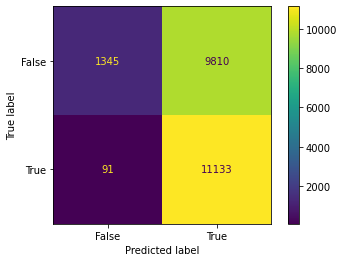


True Negatives : 6.01%
False Positives : 43.84%
False Negatives : 0.41%
True Positives : 49.75%


In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics

# Calculating and displaying the confusion matrix representing the number of True/False Negatives/Positives
cm = metrics.confusion_matrix(y_test, mnb_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()

# Showing the percentages of each
print("\nTrue Negatives : {:0.2f}%".format(cm[0][0]*100/sum(cm[0]+cm[1])))
print("False Positives : {:0.2f}%".format(cm[0][1]*100/sum(cm[0]+cm[1])))
print("False Negatives : {:0.2f}%".format(cm[1][0]*100/sum(cm[0]+cm[1])))
print("True Positives : {:0.2f}%".format(cm[1][1]*100/sum(cm[0]+cm[1])))

##**ROC Curve**

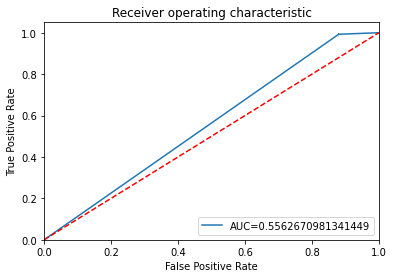

In [ ]:
from sklearn.metrics import roc_curve

# Plotting the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, label="AUC="+str(roc_auc_score(y_test, mnb_prob[:, 1])))
plt.plot([0, 1], [0, 1],'r--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc=4)

plt.show()

# **K-Nearest Neighbours**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, mean_absolute_error

weighted_acc_list, weighted_auc_list, weighted_mae_list, unweighted_acc_list, unweighted_auc_list, unweighted_mae_list = [],[],[],[],[],[]

for i in range(1,11) :

    # Training the Weighted KNN Classifier
    weighted_neigh = KNeighborsClassifier(n_neighbors=i**2, weights='distance')
    unweighted_neigh = KNeighborsClassifier(n_neighbors=i**2)

    # Splitting the dataset into training and testing sets
    df_train, df_test = train_test_split(smoke_process, test_size=0.25)

    # Separate training data into inputs and true output
    X_train = df_train.iloc[:,0:12].to_numpy()
    y_train = df_train["Fire Alarm"].to_numpy()

    # Separate test data into inputs and true output
    X_test = df_test.iloc[:,0:12].to_numpy()
    y_test = df_test["Fire Alarm"].to_numpy()

    # Training & Fitting the Weighted KNN Classifier
    weighted_neigh = KNeighborsClassifier(n_neighbors=i**2, weights='distance')
    weighted_neigh.fit(X_train, y_train)
    weighted_y_pred = weighted_neigh.fit(X_train, y_train).predict(X_test) 
    weighted_acc = accuracy_score(y_test, weighted_y_pred)
    weighted_auc = roc_auc_score(y_test, weighted_y_pred)

    # Training & Fitting the Unweighted KNN Classifier
    unweighted_neigh = KNeighborsClassifier(n_neighbors=i**2)
    unweighted_neigh.fit(X_train, y_train)
    unweighted_y_pred = unweighted_neigh.fit(X_train, y_train).predict(X_test)
    unweighted_acc = accuracy_score(y_test, unweighted_y_pred)
    unweighted_auc = roc_auc_score(y_test, unweighted_y_pred)

    # Predicting the label of the testing data
    weighted_y_pred = weighted_neigh.fit(X_train, y_train).predict(X_test) 
    unweighted_y_pred = unweighted_neigh.fit(X_train, y_train).predict(X_test)
    
    # Generating the scores
    weighted_acc = accuracy_score(y_test, weighted_y_pred)
    weighted_auc = roc_auc_score(y_test, weighted_y_pred)
    weighted_mae = round(mean_absolute_error(y_test, weighted_y_pred), 4)

    unweighted_acc = accuracy_score(y_test, unweighted_y_pred)
    unweighted_auc = roc_auc_score(y_test, unweighted_y_pred)
    unweighted_mae = round(mean_absolute_error(y_test, unweighted_y_pred), 4)

    # print(weighted_acc, weighted_auc,unweighted_acc,unweighted_auc)
    weighted_acc_list.append(weighted_acc)
    weighted_auc_list.append(weighted_auc)
    weighted_mae_list.append(weighted_mae)

    unweighted_acc_list.append(unweighted_acc)
    unweighted_auc_list.append(unweighted_auc)
    unweighted_mae_list.append(unweighted_mae)

# Creating a table with all the scores
weighted_table = pd.DataFrame({'Accuracy' : unweighted_acc_list,'AUC' : unweighted_auc_list,'Mean Absolute Error' : unweighted_mae_list})

# Showing the complete Table sorted by accuracy
weighted_table.sort_values(by=['Accuracy','AUC'], inplace=True, ascending=False)
weighted_table.head()

,Accuracy,AUC,Mean Absolute Error
0,0.999745,0.999754,0.0003
1,0.999681,0.999514,0.0003
2,0.999553,0.999278,0.0004
3,0.999489,0.999237,0.0005
6,0.999425,0.999122,0.0006



True Negatives : 28.63%
False Positives : 0.06%
False Negatives : 0.04%
True Positives : 71.27%


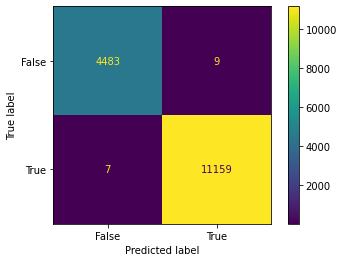

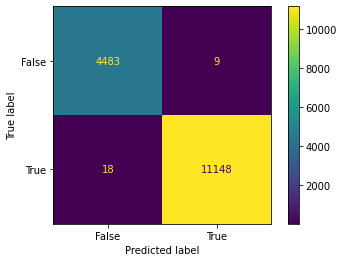


True Negatives : 28.63%
False Positives : 0.06%
False Negatives : 0.11%
True Positives : 71.20%


In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, weighted_y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()

# Showing the percentages of each
print("\nTrue Negatives : {:0.2f}%".format(cm[0][0]*100/sum(cm[0]+cm[1])))
print("False Positives : {:0.2f}%".format(cm[0][1]*100/sum(cm[0]+cm[1])))
print("False Negatives : {:0.2f}%".format(cm[1][0]*100/sum(cm[0]+cm[1])))
print("True Positives : {:0.2f}%".format(cm[1][1]*100/sum(cm[0]+cm[1])))

cm = metrics.confusion_matrix(y_test, unweighted_y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()

# Showing the percentages of each
print("\nTrue Negatives : {:0.2f}%".format(cm[0][0]*100/sum(cm[0]+cm[1])))
print("False Positives : {:0.2f}%".format(cm[0][1]*100/sum(cm[0]+cm[1])))
print("False Negatives : {:0.2f}%".format(cm[1][0]*100/sum(cm[0]+cm[1])))
print("True Positives : {:0.2f}%".format(cm[1][1]*100/sum(cm[0]+cm[1])))

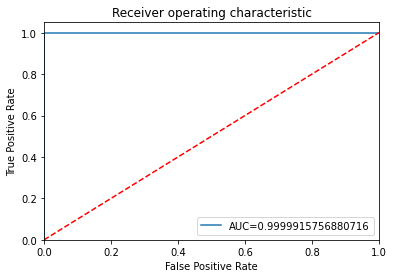

In [ ]:
from sklearn.metrics import roc_curve

y_pred = weighted_neigh.predict(X_test)
y_prob = weighted_neigh.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])

plt.plot(fpr, tpr, label="AUC="+str(roc_auc_score(y_test, y_prob[:, 1])))
plt.plot([0, 1], [0, 1],'r--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc=4)

plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Get report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4518
           1       1.00      1.00      1.00     11140

    accuracy                           1.00     15658
   macro avg       1.00      1.00      1.00     15658
weighted avg       1.00      1.00      1.00     15658



In [ ]:
# AUC and accuracies of KNN and WNN using different values of K
# Make sure to get a table of all AUC and accuracies

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, mean_absolute_error, mean_squared_error

x = smoke.drop(columns='Fire Alarm')
y = np.array(smoke['Fire Alarm'])

Xmods = pd.get_dummies(x)
Xmods

uwaccuracies = []; uwaucs = []; waccuracis = []; waucs = [];
err=[]
for k in range(1,11):
  X_train, X_test, y_train, y_test = train_test_split(Xmods, y, test_size=0.25, stratify=y)
  uwknnclf = KNeighborsClassifier(n_neighbors=k,weights='uniform')
  uwknnclf.fit(X_train,y_train)
  ypreds = uwknnclf.predict(X_test)
  # uwaccuracies.append(accuracy_score(y_test,y_predict))
  uwaccuracies.append(sum(y_test==ypreds)/len(y_test))
  uwaucs.append(roc_auc_score(y_test ,uwknnclf.predict_proba(X_test)[:,1]))
  wknnclf = KNeighborsClassifier(n_neighbors=k,weights='distance')
  wknnclf.fit(X_train,y_train)
  ypreds = wknnclf.predict(X_test)
  waccuracis.append(sum(y_test==ypreds)/len(y_test))
  waucs.append(roc_auc_score(y_test ,wknnclf.predict_proba(X_test)[:,1]))

  # Getting the error scores for the model
  mae_mnb = round(mean_absolute_error(y_test, ypreds), 4)
  err.append(mae_mnb)
pd.DataFrame({'k':list(range(1,11)),'Accuracy (KNN)':uwaccuracies,'AUC (KNN)':uwaucs,'Accuracy (WNN)':waccuracis,'AUC (WNN)':waucs,'Mean Absolute Error':err})

,k,Accuracy (KNN),AUC (KNN),Accuracy (WNN),AUC (WNN),Mean Absolute Error
0,1,1.000000,1.000000,1.000000,1.000000,0.0000
1,2,0.999745,0.999821,0.999745,0.999821,0.0003
2,3,0.999745,1.000000,0.999872,1.000000,0.0001
3,4,0.999872,1.000000,0.999808,1.000000,0.0002
4,5,0.999745,0.999888,0.999745,0.999888,0.0003
5,6,1.000000,1.000000,1.000000,1.000000,0.0000
6,7,0.999681,0.999910,0.999681,0.999910,0.0003
7,8,0.999745,0.999776,0.999745,0.999776,0.0003
8,9,0.999745,0.999776,0.999745,0.999776,0.0003
9,10,0.999681,0.999888,0.999745,0.999888,0.0003


##**Logistic Regression**

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score,mean_absolute_error, mean_squared_error

lr_acc = []
lr_auc = []
lr_pc = []
lr_rc = []
lr_score = []
lr_mae = []
lr_mse = [] 

# Calculating 20 random train-test split for logistic regression
for i in range(100):

  # Split data into a trainiing and testing set where test size is 30 %
  df_train, df_test = train_test_split(smoke_process, test_size=0.3)

  # Setting the "Fire Alarm" column series as target
  y_train = df_train["Fire Alarm"].to_numpy()
  y_test = df_test["Fire Alarm"].to_numpy()

  # Setting differents columns series as Features
  X_train = df_train.iloc[:,0:12].to_numpy()
  X_test = df_test.iloc[:,0:12].to_numpy()

  # Create Logistic Regression model and fit to training data
  lr_model = LogisticRegression(max_iter = 10000).fit(X_train, y_train)
  
  # Predict y_preb and y_prob using the fitted model above
  y_pred = lr_model.predict(X_test)
  y_prob = lr_model.predict_proba(X_test)

  # Get result
  lr_acc.append(accuracy_score(y_test, y_pred))
  lr_auc.append(roc_auc_score(y_test, y_prob[:, 1]))
  lr_pc.append(precision_score(y_test, y_pred))
  lr_rc.append(recall_score(y_test, y_pred))
  lr_score.append(lr_model.score(X_test, y_test))
  lr_mae.append(mean_absolute_error(y_test, y_pred))
  lr_mse.append(mean_squared_error(y_test, y_pred))

lr_table = pd.DataFrame({'Accuracy' : lr_acc,'AUC' : lr_auc,'Precision' : lr_pc, 'Sensitivity' : lr_rc, 'Score' : lr_score, 'Mean Absolute Error' : lr_mae, 'Mean Squared Error' : lr_mse})

# Showing the complete Table
lr_table.sort_values(by=['Accuracy','AUC'], inplace=True, ascending=False)
lr_table.head(5)

,Accuracy,AUC,Precision,Sensitivity,Score,Mean Absolute Error,Mean Squared Error
70,0.885358,0.955191,0.871341,0.985273,0.885358,0.114642,0.114642
19,0.885199,0.953679,0.873961,0.982997,0.885199,0.114801,0.114801
5,0.884667,0.952024,0.871819,0.983414,0.884667,0.115333,0.115333
64,0.884134,0.954019,0.869208,0.986057,0.884134,0.115866,0.115866
66,0.883815,0.953192,0.871283,0.983551,0.883815,0.116185,0.116185


##**Report**

In [ ]:
from sklearn.metrics import classification_report

# Get report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.62      0.75      5368
           1       0.87      0.98      0.92     13421

    accuracy                           0.88     18789
   macro avg       0.90      0.80      0.83     18789
weighted avg       0.89      0.88      0.87     18789



##**Confusion Matrix**

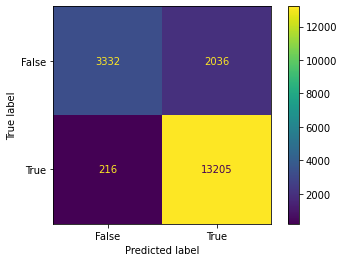


True Negatives : 17.73%
False Positives : 10.84%
False Negatives : 1.15%
True Positives : 70.28%


In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics

# Creating a Confusion Matrix
cm = metrics.confusion_matrix(y_test, y_pred)

# Ploting the Matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()

# Printing out the percentages
print("\nTrue Negatives : {:0.2f}%".format(cm[0][0]*100/sum(cm[0]+cm[1])))
print("False Positives : {:0.2f}%".format(cm[0][1]*100/sum(cm[0]+cm[1])))
print("False Negatives : {:0.2f}%".format(cm[1][0]*100/sum(cm[0]+cm[1])))
print("True Positives : {:0.2f}%".format(cm[1][1]*100/sum(cm[0]+cm[1])))

##**ROC Curve**

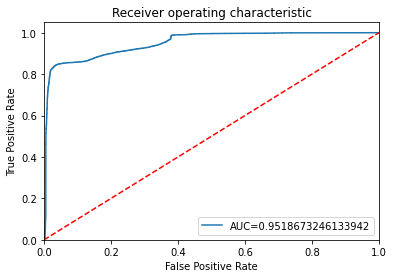

In [ ]:
from sklearn.metrics import roc_curve

# Ploting the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])

plt.plot(fpr, tpr, label="AUC="+str(roc_auc_score(y_test, y_prob[:, 1])))
plt.plot([0, 1], [0, 1],'r--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc=4)

plt.show()

##**MLPClassifier**

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score

mlp_acc = []
mlp_auc = []
mlp_pc = []
mlp_rc = []
mlp_score = []
mlp_mae = []
mlp_mse = [] 


# Calculating 5 random train-test split for MLP Classifier
for i in range(5):

  # Split data into a trainiing and testing set where test size is 30 %
  df_train, df_test = train_test_split(smoke_process, test_size=0.3)

  # Setting the "Fire Alarm" column series as target
  y_train = df_train["Fire Alarm"].to_numpy()
  y_test = df_test["Fire Alarm"].to_numpy()

  # Setting differents columns series as Features
  X_train = df_train.iloc[:,0:12].to_numpy()
  X_test = df_test.iloc[:,0:12].to_numpy()

  # Create Logistic Regression model and fit to training data
  MLP_model = MLPClassifier(random_state = 1, hidden_layer_sizes = (20,), batch_size = 20, max_iter = 100).fit(X_train, y_train)
  
  # Predict y_preb and y_prob using the fitted model above
  mlp_y_pred = MLP_model.predict(X_test)
  mlp_y_prob = MLP_model.predict_proba(X_test)

  # Get result
  mlp_acc.append(accuracy_score(y_test, mlp_y_pred))
  mlp_auc.append(roc_auc_score(y_test, mlp_y_prob[:, 1]))
  mlp_pc.append(precision_score(y_test, mlp_y_pred))
  mlp_rc.append(recall_score(y_test, mlp_y_pred))
  mlp_score.append(MLP_model.score(X_test, y_test))
  mlp_mae.append(mean_absolute_error(y_test, y_pred))
  mlp_mse.append(mean_squared_error(y_test, y_pred))   
mlp_table = pd.DataFrame({'Accuracy' : mlp_acc,'AUC' : mlp_auc,'Precision' : mlp_pc, 'Sensitivity' : mlp_rc, 'Score' : mlp_score, 'Mean Absolute Error' : mlp_mae, 'Mean Squared Error' : mlp_mse})

# Showing the complete Table
mlp_table.sort_values(by=['Accuracy','AUC'], inplace=True, ascending=False)
mlp_table.head(5)

,Accuracy,AUC,Precision,Sensitivity,Score,Mean Absolute Error,Mean Squared Error
0,0.983820,0.996169,0.985080,0.992521,0.983820,0.361648,0.361648
1,0.966789,0.996078,0.995496,0.957714,0.966789,0.364362,0.364362
3,0.948534,0.997602,0.998880,0.929071,0.948534,0.364841,0.364841
2,0.918782,0.988732,0.899137,0.998588,0.918782,0.367236,0.367236
4,0.899250,0.976877,0.878877,0.997185,0.899250,0.358135,0.358135


##**Report**

In [ ]:
from sklearn.metrics import classification_report

# Get report
print(classification_report(y_test, mlp_y_pred))

              precision    recall  f1-score   support

           0       0.99      0.65      0.78      5291
           1       0.88      1.00      0.93     13498

    accuracy                           0.90     18789
   macro avg       0.93      0.82      0.86     18789
weighted avg       0.91      0.90      0.89     18789



##**Confusion Matrix**

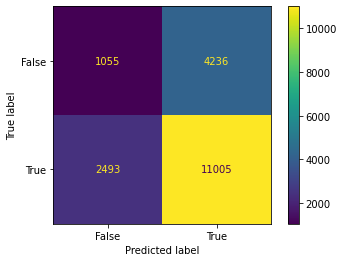


True Negatives : 5.61%
False Positives : 22.55%
False Negatives : 13.27%
True Positives : 58.57%


In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics

# Creating a Confusion Matrix
cm = metrics.confusion_matrix(y_test, y_pred)

# Ploting the Matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()

# Printing out the percentages
print("\nTrue Negatives : {:0.2f}%".format(cm[0][0]*100/sum(cm[0]+cm[1])))
print("False Positives : {:0.2f}%".format(cm[0][1]*100/sum(cm[0]+cm[1])))
print("False Negatives : {:0.2f}%".format(cm[1][0]*100/sum(cm[0]+cm[1])))
print("True Positives : {:0.2f}%".format(cm[1][1]*100/sum(cm[0]+cm[1])))

##**ROC Curve**

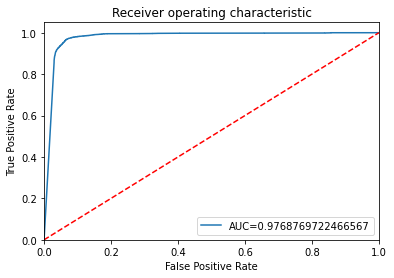

In [ ]:
from sklearn.metrics import roc_curve

# Ploting the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, mlp_y_prob[:,1])

plt.plot(fpr, tpr, label="AUC="+str(roc_auc_score(y_test, mlp_y_prob[:, 1])))
plt.plot([0, 1], [0, 1],'r--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc=4)

plt.show()

#**Gaussian Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

mnb_acc_list, mnb_auc_list, mnb_pc, mnb_rc, mnb_score, mnb_mae, mnb_mse=[],[],[],[],[],[],[]

for i in range(1,11) :

  # Split dataset into training and testing sets with test size: 25%
  df_train, df_test = train_test_split(smoke_process, test_size=0.25)

  # Separate training data into inputs and true output
  X_train = df_train.iloc[:,0:12].to_numpy()
  X_test = df_test.iloc[:,0:12].to_numpy()
  y_train = df_train["Fire Alarm"].to_numpy()
  y_test = df_test["Fire Alarm"].to_numpy()

  # Fitting the classifier into the training data
  gnb = GaussianNB()
  gnb.fit(X_train, y_train)

  # Predicting the label of the testing data
  gnb_y_pred = gnb.fit(X_train, y_train).predict(X_test)
      
  # Generating the scores
  # gnb_acc = accuracy_score(y_test, gnb_y_pred)
  # gnb_auc = roc_auc_score(y_test, gnb_y_pred)
  mae_mnb = round(mean_absolute_error(y_test, gnb_y_pred), 4)
  # print(gnb_acc, gnb_auc)
  mnb_acc_list.append(accuracy_score(y_test, gnb_y_pred))
  mnb_auc_list.append(roc_auc_score(y_test, gnb_y_pred))
  mnb_mae.append(mae_mnb)

mnb_table = pd.DataFrame({'Accuracy' : mnb_acc_list,'AUC' : mnb_auc_list,'Mean Absolute Error' : mnb_mae})

# Showing the complete Table sorted by accuracy
mnb_table.sort_values(by=['Accuracy','AUC'], inplace=True, ascending=False)
mnb_table.head()


,Accuracy,AUC,Mean Absolute Error
9,0.771427,0.610021,0.2286
8,0.770597,0.610092,0.2294
6,0.767723,0.608605,0.2323
5,0.767403,0.608856,0.2326
4,0.765807,0.605217,0.2342


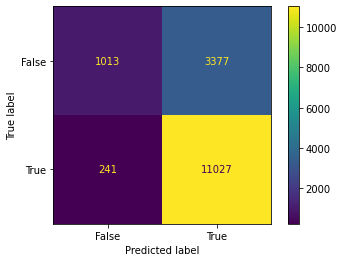


True Negatives : 6.47%
False Positives : 21.57%
False Negatives : 1.54%
True Positives : 70.42%


In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics 

# Draw confusion matrix
gnb_cm = metrics.confusion_matrix(y_test, gnb_y_pred)
gnb_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = gnb_cm, display_labels = [False, True])
gnb_cm_display.plot()
plt.show()

print("\nTrue Negatives : {:0.2f}%".format(gnb_cm[0][0]*100/sum(gnb_cm[0]+gnb_cm[1])))
print("False Positives : {:0.2f}%".format(gnb_cm[0][1]*100/sum(gnb_cm[0]+gnb_cm[1])))
print("False Negatives : {:0.2f}%".format(gnb_cm[1][0]*100/sum(gnb_cm[0]+gnb_cm[1])))
print("True Positives : {:0.2f}%".format(gnb_cm[1][1]*100/sum(gnb_cm[0]+gnb_cm[1])))


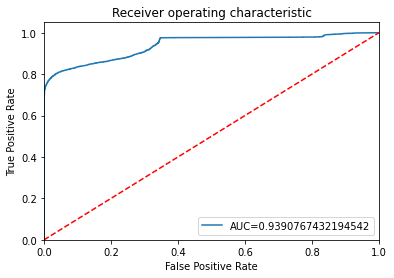

In [ ]:
from sklearn.metrics import roc_curve

# Draw ROC curve
y_prob = gnb.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])

plt.plot(fpr, tpr, label="AUC="+str(roc_auc_score(y_test, y_prob[:, 1])))
plt.plot([0, 1], [0, 1],'r--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc=4)

plt.show()

In [ ]:
from sklearn.metrics import classification_report

#Print report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.24      0.37      4501
           1       0.76      0.98      0.85     11157

    accuracy                           0.76     15658
   macro avg       0.78      0.61      0.61     15658
weighted avg       0.77      0.76      0.71     15658

